# Very naive learning on the vector of surrounding bases with standardish machine learning algorithms from scikit sklearn

---

### Analysis

I will try to naively predict the mehtylation value (0,1) based on naive sequence context feauture vectors.

I will use the "state of the art" general machine learning tools.
- AdaBoost
- RandomForest
- SVM


### Conlcusions

- All naive models produce 70-75% prediction rates.
    - actually I think that's surprisinlgy high 
    
    

- They are "simple" models, they do not gain much from the overwhelming number of data points.
    - 5k -> 80k only increases 1-2%
    - I can have around 250k data points !!!


- Very interesting position importance figure with Random Forest.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

from sklearn import tree
from sklearn import svm
from sklearn import ensemble

import sys
sys.path.append('../my_modules')
from loading_utils import read_my_data,create_sets

#workdir='/nagyvinyok/adat84/sotejedlik/ribli/methylation_code/modelling'
#subprocess.call(['mkdir',workdir])
#os.chdir(workdir)

Couldn't import dot_parser, loading of dot files will not be possible.


### Load data

In [2]:
x,y= read_my_data(fname='../prepare_data/small_meth_feat_vect.csv')

Loading data... 


In [3]:
def test_sklearn_model(model,train_x,train_y,test_x,test_y):
    start=time.time()
    model=model.fit(train_x,train_y)
    print 'train score:',list((model.predict(train_x)==train_y)).count(True)/float(len(train_y))
    print 'test score:',list((model.predict(test_x)==test_y)).count(True)/float(len(test_y))
    print 'It took:',time.time()-start

## AdaBoost

- learning rate / n_estimators can be tuned
- more estimators -> better result, and slower

In [5]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=2000)

adab = ensemble.AdaBoostClassifier(n_estimators=100)
test_sklearn_model(adab,train_x,train_y,test_x,test_y)

train score: 0.755
test score: 0.6762
It took: 29.1481819153


- It gets a bit better using more data

In [8]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=80000,N_valid=0,N_test=10000,length=2000)

adab = ensemble.AdaBoostClassifier(n_estimators=100)
test_sklearn_model(adab,train_x,train_y,test_x,test_y)

train score: 0.7269
test score: 0.7173
It took: 865.866047859


- Its already quite slow, but maybe I could test with more estimators

In [5]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=80000,N_valid=0,N_test=10000,length=2000)

adab = ensemble.AdaBoostClassifier(n_estimators=1000)
test_sklearn_model(adab,train_x,train_y,test_x,test_y)

train score: 0.764475
test score: 0.7387
It took: 4249.48041391


---

## Random Forest

- n_estimators can be tuned
- the characteristics of the decision trees can be also tuned (min_samples_split)

In [7]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=2000)

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100)
test_sklearn_model(rf,train_x,train_y,test_x,test_y)

train score: 0.9148
test score: 0.7228
It took: 3.0368411541


- With more data it gets just a bit better

In [11]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=80000,N_valid=0,N_test=10000,length=2000)

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100)
test_sklearn_model(rf,train_x,train_y,test_x,test_y)

train score: 0.8846
test score: 0.7342
It took: 73.8546850681


- With more estimators it also get just a bit better

In [12]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=80000,N_valid=0,N_test=10000,length=2000)

rf = ensemble.RandomForestClassifier(n_estimators=1000,min_samples_split=100)
test_sklearn_model(rf,train_x,train_y,test_x,test_y)

train score: 0.89475
test score: 0.7396
It took: 736.874958992


---

## Support vector machine

- The ones before were robust against unnecessary dimesnions
    - here the number of dimensions is too high
        - i will try to feed it with smaller dimension (radius) data
    

- Note it's impossible to interrupt the python kernel when it's running

##### Linear kernel
- bad

In [13]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=100)

lin_svm = svm.SVC(kernel='linear')
test_sklearn_model(lin_svm,train_x,train_y,test_x,test_y)

train score: 0.5778
test score: 0.5154
It took: 14.3908178806


##### Polynomial kernel

- A bit better

In [14]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=100)

poly_svm = svm.SVC(kernel='poly',C=0.01)
test_sklearn_model(poly_svm,train_x,train_y,test_x,test_y)

train score: 0.742
test score: 0.5692
It took: 7.07050418854


##### Radial base function kernel
- Better
- Learning rate can be tuned

In [15]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=100)

rbf_svm = svm.SVC(kernel='rbf',C=0.1)
test_sklearn_model(rbf_svm,train_x,train_y,test_x,test_y)

train score: 0.7242
test score: 0.6774
It took: 8.04712486267


- With more context it becomes a bit better (slower)

In [16]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=400)

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
test_sklearn_model(rbf_svm,train_x,train_y,test_x,test_y)

train score: 0.8186
test score: 0.7198
It took: 25.9378929138


- With too long context it becomes worse !!

In [17]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=2000)

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
test_sklearn_model(rbf_svm,train_x,train_y,test_x,test_y)

train score: 0.8276
test score: 0.6986
It took: 138.221462011


- With more data?

In [4]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=80000,N_valid=0,N_test=10000,length=400)

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
test_sklearn_model(rbf_svm,train_x,train_y,test_x,test_y)

train score: 0.78745
test score: 0.7246
It took: 4850.33963799


---
## Feature importance with Random Forest

- Very strong asymmetry !

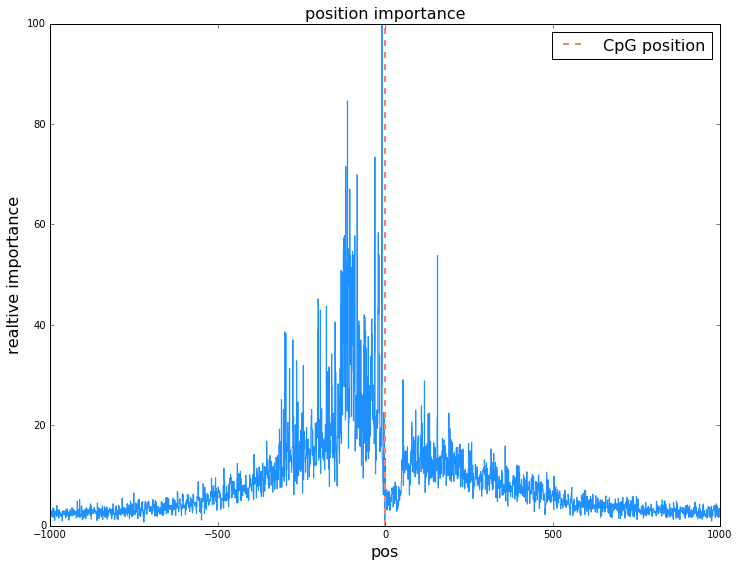

In [13]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=80000,N_valid=0,N_test=0,length=2000)

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100)
model=rf.fit(train_x,train_y)
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.step(np.arange(len(feature_importance))-1000, feature_importance,lw=1,c='dodgerblue')
ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='CpG position')
ax.set_ylabel('realtive importance',fontsize=16)
ax.set_xlabel('pos',fontsize=16)
ax.set_xlim(-1000,1000)
ax.legend(fontsize=16)
dump=ax.set_title('position importance',fontsize=16)